## Hypothesis
To predict the incentive level requested for lowering thermostat settings for 2-3F 
    when being at home in winter.
    
DV: IncHomeW    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [324]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [81] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [86] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [91] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [96] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
[101] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [325]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [326]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeS", "AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 104
[1] 490 104


In [327]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeW",
"Winter_avgF",
"CashYN")

In [328]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeW"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "CashYN"      "ComfNW"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeW"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Trust"       "Winter_avgF"

In [329]:
data1 <- data2[, which(names(data2) %in% c("IncHomeW",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "CashYN"      "ComfNW"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeW"       "HouseholdS"  "IncHomeW"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Winter_avgF"

In [330]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [331]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [332]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeW"       "IncHomeW"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "PBC"         "CashYN"     
[16] "MC"          "ComfNW"      "Atti"        "SubNorm"     "SN"         
[21] "HabitG"      "HabitC"      "Winter_avgF"

In [333]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [334]:
#convert all data to numeric values

sapply(data2,sd)

HomeW    IncHomeW         Age      Gender     OwnRent    SqftCate 
       3.36        4.62       11.23        0.50        0.51        1.13 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.21        0.85        0.35        1.98        1.12        5.09 
    EnergyC         PBC      CashYN          MC      ComfNW        Atti 
       1.39        0.93        0.28        1.08        1.71        1.08 
    SubNorm          SN      HabitG      HabitC Winter_avgF 
       1.34        1.40        1.16        1.38       11.43

In [335]:
hiCor(data2,.7)

,Latitude,Winter_avgF
Latitude,1.00,-0.85
Winter_avgF,-0.85,1.00


In [336]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:23];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:23){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    EnergyC   PBC    MC  Atti SubNorm    SN HabitG HabitC
PC1    -0.4 -0.24 -0.34 -0.43   -0.36 -0.21  -0.31  -0.26
[1] 0.23
     Age OwnRent SqftCate HouseholdS Income
PC2 0.34    0.48     0.49       0.23   0.42
[1] 0.32
    HomeW HouseholdS Ethnic Latitude ComfNW HabitC Winter_avgF
PC3  0.44       0.21  -0.25    -0.46   0.28  -0.24        0.48
[1] 0.39
    Gender HouseholdS Latitude ComfNW Winter_avgF
PC4  -0.28      -0.37    -0.45  -0.39        0.42
[1] 0.45
    HouseholdS Political Ethnic Income Educ EnergyC   PBC HabitG
PC5      -0.21      0.53  -0.22   0.25 0.42    0.29 -0.29  -0.31
[1] 0.5
    IncHomeW  Age HouseholdS Ethnic CashYN   MC ComfNW    SN HabitC
PC6      0.5 0.41      -0.26   0.24   0.32 0.23   0.23 -0.29  -0.23
[1] 0.55
    IncHomeW   Age Gender Income Educ  PBC CashYN
PC7    -0.27 -0.24  -0.34   0.34 0.22 0.29   0.56
[1] 0.6
    IncHomeW  Age Gender SubNorm    SN
PC8    -0.61 0.25   0.54   -0.26 -0.34
[1] 0.64
    HomeW HouseholdS Educ EnergyC CashYN ComfNW

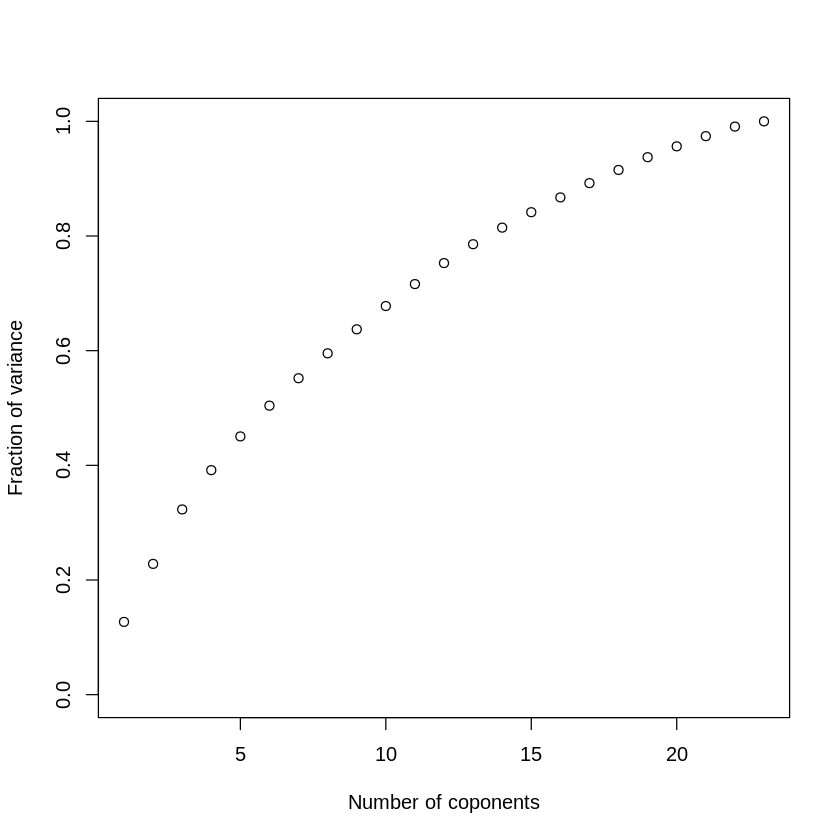

In [337]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [338]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [339]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Winter_avgF,23,0.62
Latitude,12,0.61
Atti,18,0.44
SqftCate,6,0.42
EnergyC,13,0.39
OwnRent,5,0.35
Income,10,0.30
SubNorm,19,0.27
HouseholdS,7,0.26
HabitC,22,0.26
MC,16,0.25


In [340]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeW    IncHomeW         Age      Gender     OwnRent    SqftCate 
       0.91        1.00        1.00        0.92        0.99        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       0.99        0.95        0.95        0.99        0.98        0.28 
    EnergyC         PBC      CashYN          MC      ComfNW        Atti 
       0.55        0.90        0.99        0.75        0.99        0.44 
    SubNorm          SN      HabitG      HabitC Winter_avgF 
       0.73        0.92        0.83        0.88        0.18 

Loadings:
            Factor1 Factor2
EnergyC      0.66          
Atti         0.75          
SubNorm      0.52          
Latitude            -0.84  
Winter_avgF          0.90  
HomeW                0.30  
IncHomeW                   
Age                        
Gender                     
OwnRent                    
SqftCate                   
HouseholdS      

In [341]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [342]:
#Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
#    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC, Winter_avgF

In [355]:
#IndepPred = c('Age', 'Gender', 'OwnRent', 'HouseholdS', 'Educ', 'Income', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF', 'Atti', 'PBC', 'SubNorm')
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'HouseholdS', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF')

In [356]:
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [357]:
table(data2[,"IncHomeW"])


  1   2   3   4   5   6   7   8  99 
 32  33  66 167  62  59  46  24   1 

In [358]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.23  -1.45  -0.23   1.12  90.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.72673    1.90145    2.49   0.0133 * 
Age          0.01880    0.02023    0.93   0.3533   
Income      -0.28446    0.12166   -2.34   0.0198 * 
Educ        -0.12030    0.19918   -0.60   0.5461   
OwnRent      0.93126    0.49212    1.89   0.0590 . 
SqftCate     0.15952    0.23754    0.67   0.5022   
HouseholdS  -0.27234    0.19208   -1.42   0.1569   
EnergyC      0.13625    0.15576    0.87   0.3822   
MC           0.23742    0.20182    1.18   0.2400   
ComfNW       0.09747    0.12745    0.76   0.4448   
HabitC      -0.49211    0.16175   -3.04   0.0025 **
Winter_avgF  0.00184    0.01839    0.10   0.9204   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.5 on 478 degrees of freedom
Multiple R-squared:  0.053,	Adjusted R-squared:  0.0312 
F-sta

In [359]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,46.25,46.25,2.2348,0.1356
Income,1,113.37,113.37,5.4783,0.0197
Educ,1,13.26,13.26,0.6408,0.4238
OwnRent,1,82.13,82.13,3.9685,0.0469
SqftCate,1,0.18,0.18,0.0085,0.9267
HouseholdS,1,22.30,22.30,1.0775,0.2998
EnergyC,1,12.79,12.79,0.6179,0.4322
MC,1,12.13,12.13,0.5861,0.4443
ComfNW,1,58.23,58.23,2.8139,0.0941
HabitC,1,192.75,192.75,9.3137,0.0024


In [360]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<40)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    40)

Residuals:
   Min     1Q Median     3Q    Max 
-3.744 -1.232 -0.155  1.162  4.072 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.40852    1.11487    3.06   0.0025 **
Age          0.00548    0.01062    0.52   0.6065   
Income      -0.06894    0.06500   -1.06   0.2898   
Educ         0.02622    0.10184    0.26   0.7970   
OwnRent      0.38883    0.26692    1.46   0.1463   
SqftCate     0.08344    0.12475    0.67   0.5041   
HouseholdS  -0.06789    0.10398   -0.65   0.5144   
EnergyC      0.06741    0.08151    0.83   0.4089   
MC           0.05769    0.10171    0.57   0.5711   
ComfNW       0.14262    0.06546    2.18   0.0302 * 
HabitC      -0.10360    0.08533   -1.21   0.2258   
Winter_avgF -0.00712    0.01587   -0.45   0.6539   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 278 degrees of freedom
Multiple R-squared:  0.0

In [361]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,5.4e+00,5.3838,1.6708,0.1972
Income,1,1.1e+00,1.0736,0.3332,0.5643
Educ,1,4.9e-03,0.0049,0.0015,0.9689
OwnRent,1,8.2e+00,8.1652,2.5339,0.1126
SqftCate,1,4.8e-01,0.4796,0.1488,0.6999
HouseholdS,1,6.0e-01,0.5959,0.1849,0.6675
EnergyC,1,1.2e+00,1.2136,0.3766,0.5399
MC,1,5.0e-01,0.4989,0.1548,0.6943
ComfNW,1,2.4e+01,24.2099,7.5131,0.0065
HabitC,1,4.4e+00,4.4242,1.3730,0.2423


In [362]:
#added CashYN to model
#IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF', 'CashYN')
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'HouseholdS', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF','CashYN')
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [363]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.25  -1.46  -0.23   1.10  90.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.59438    1.98998    2.31   0.0214 * 
Age          0.01855    0.02028    0.91   0.3609   
Income      -0.28596    0.12196   -2.34   0.0195 * 
Educ        -0.12153    0.19945   -0.61   0.5426   
OwnRent      0.93847    0.49362    1.90   0.0579 . 
SqftCate     0.16218    0.23807    0.68   0.4960   
HouseholdS  -0.27194    0.19228   -1.41   0.1579   
EnergyC      0.13542    0.15595    0.87   0.3856   
MC           0.23297    0.20296    1.15   0.2516   
ComfNW       0.09746    0.12757    0.76   0.4453   
HabitC      -0.48915    0.16243   -3.01   0.0027 **
Winter_avgF  0.00167    0.01842    0.09   0.9278   
CashYNTRUE   0.17015    0.74668    0.23   0.8198   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.5 on 477 degrees of freedom
Multiple R

In [364]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,46.25,46.25,2.2304,0.1360
Income,1,113.37,113.37,5.4675,0.0198
Educ,1,13.26,13.26,0.6395,0.4243
OwnRent,1,82.13,82.13,3.9606,0.0471
SqftCate,1,0.18,0.18,0.0084,0.9268
HouseholdS,1,22.30,22.30,1.0753,0.3003
EnergyC,1,12.79,12.79,0.6167,0.4327
MC,1,12.13,12.13,0.5849,0.4448
ComfNW,1,58.23,58.23,2.8083,0.0944
HabitC,1,192.75,192.75,9.2952,0.0024


In [365]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<40)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    40)

Residuals:
   Min     1Q Median     3Q    Max 
-3.744 -1.232 -0.155  1.162  4.073 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.41300    1.16381    2.93   0.0036 **
Age          0.00549    0.01069    0.51   0.6079   
Income      -0.06898    0.06518   -1.06   0.2908   
Educ         0.02626    0.10207    0.26   0.7971   
OwnRent      0.38844    0.26891    1.44   0.1497   
SqftCate     0.08343    0.12497    0.67   0.5050   
HouseholdS  -0.06784    0.10422   -0.65   0.5156   
EnergyC      0.06746    0.08172    0.83   0.4098   
MC           0.05779    0.10216    0.57   0.5721   
ComfNW       0.14256    0.06572    2.17   0.0309 * 
HabitC      -0.10371    0.08592   -1.21   0.2284   
Winter_avgF -0.00712    0.01590   -0.45   0.6547   
CashYNTRUE  -0.00500    0.36572   -0.01   0.9891   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.

In [366]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,5.4e+00,5.4e+00,1.66475,0.1980
Income,1,1.1e+00,1.1e+00,0.33198,0.5650
Educ,1,4.9e-03,4.9e-03,0.00152,0.9689
OwnRent,1,8.2e+00,8.2e+00,2.52480,0.1132
SqftCate,1,4.8e-01,4.8e-01,0.14830,0.7005
HouseholdS,1,6.0e-01,6.0e-01,0.18427,0.6681
EnergyC,1,1.2e+00,1.2e+00,0.37527,0.5406
MC,1,5.0e-01,5.0e-01,0.15427,0.6948
ComfNW,1,2.4e+01,2.4e+01,7.48608,0.0066
HabitC,1,4.4e+00,4.4e+00,1.36804,0.2432
